### Clase 1 para el cálculo de la función de la energía de Helmholtz y sus primeras derivadas Thermodynamic Models: FUNDAMENTALS & COMPUTATIONAL ASPECTS. Second Edition Michael L. Michelsen, Jorgen M. Mollerup 

In [2]:
from IPython.display import Image



In [3]:
i = Image(filename='logo.jpg')


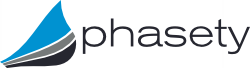

In [4]:
i

<H1><font color="blue">IPyTher: Interactive Python to Thermodynamics</font></H1> 

In [5]:
#Clase 1 para el cálculo de la función de la energía de Helmholtz y sus primeras derivadas
#Thermodynamic Models: FUNDAMENTALS & COMPUTATIONAL ASPECTS. Second Edition
#Michael L. Michelsen, Jorgen M. Mollerup 

# encoding: utf-8

import numpy as np

# Número de componentes
nC = 2
# Temperatura en K
T = 273.16
# Presión
#P = 2
# Constante universal de los gases
R = 0.08314472

n_1 = input("Número de moles componente 1: ")
#n_2 = input("Número de moles componente 2: ")
T = input("Temperatura del sistema en K: ")


ni = np.array([0.929, 1 - 0.929])
ni = np.array([n_1, 1 - n_1])

nT = np.sum(ni)

V = 1 / 11.1765

# Parametros kij and lij
kij = 0.05
lij = -0.05

# Metano - Hexano
Tc = np.array([[190.56], [507.6]])
Pc = np.array([[45.99], [30.25]])
w = np.array([[0.0115], [0.3013]])
Tr = T / Tc


# selección de la Ecuación de Estado
# eq = 1, para Ecuación de Estado (SRK)
# eq = 2, para Ecuación de Estado (PR)

eq = 2

if eq == 1:
    # Soave-Redlich-Kwong (SRK)
    fw = 0.480 + 1.574 * w - np.multiply(0.175, np.power(w, 2))
    s1, s2 = 1, 2
    m = 0.480 + 1.574 * w - 0.175 * w ** 2
    ac = np.multiply(0.077796070 * R ** 2, Tc ** 2) / Pc
    bc = 0.086640 * R * Tc / Pc
elif eq == 2:
    # Peng-Robinson (PR)
    fw = 0.37464 + 1.54226 * w - np.multiply(0.26992, np.power(w, 2))
    s1, s2 = 1 + 2 ** 0.5, 1 - (2 ** 0.5)
    m = 0.37464 + 1.54226 * w - 0.26992 * w ** 2
    ac = np.multiply(0.45723553 * R ** 2, Tc ** 2) / Pc
    bc = 0.077796070 * R * Tc / Pc
else:
    print ("Modelo no valido, intentelo de nuevo...")

print (("fw = ", fw))
print (("m = ", m))

#ac = np.multiply(0.42748 * R ** 2, np.power(Tc, 2))

#ac = (af * (1 + fw * (1 - Tr ** 0.5)) ** 2) / Pc

#print (("af = ", af))
print (("ac = ", ac))
print (("bc = ", bc))

alfa = (1 + m * (1 - Tr ** 0.5)) ** 2

print (("alfa = ", alfa))

a_puros = ac * alfa
b_puros = bc

print (("a_puros = ", a_puros))

a_cruz = (a_puros[0, 0] * a_puros[1, 0]) ** 0.5 * (1 - kij)
b_cruz = (b_puros[0, 0] + b_puros[1, 0]) / 2 * (1 - lij)

print (("a_cruz =", a_cruz))

aij = np.ones((len(ni), len(ni)))
bij = np.ones((len(ni), len(ni)))

for i in range(nC):
    for  j in range(nC):
        if i == j:
            aij[i, j] = a_puros[i]
            bij[i, j] = b_puros[i]
        elif i != j:
            aij[i, j] = a_cruz
            bij[i, j] = b_cruz

print (("aij = ", aij))
print (("bij = ", bij))
#------------------------------------------------------------------------------
#------------------------------------------------------------------------------

di = np.ones((len(ni), len(ni)))
Di = np.ones((len(ni)))
Bk = np.ones((len(ni), len(ni)))
Dk = np.ones((len(ni), len(ni)))
bi = np.ones((len(ni)))
D = np.ones((len(ni)))


for i in range(nC):
    for j in range(nC):
        Bk[i, j] = ni[j] * bij[i, j]
    bi[i] = ni[i] * np.sum(Bk[i, :])

print bi

B = np.sum(bi) / np.sum(ni)

print (("B: ", B))

#-------------------------------------
for i in range(nC):
    for j in range(nC):
        di[i, j] = ni[j] * aij[i, j]
    Di[i] = 2 * np.sum(di[i, :])

print (("Di: ", Di))

D = 0.5 * np.sum(ni * Di)

print (("D: ", D))
#--------------------------------------
g = np.log(V - B) - np.log(V)

Bv = B / V

print (("Bv = ", Bv))
print (("g = ", g))

f = (1 / (R * B * (s1 - s2))) * np.log((V + s1 * B) / (V + s2 * B))

print (("f: ", f))

F = -nT * g - (D / T) * f

print (("F: ", F))

Número de moles componente 1: 0.678
Temperatura del sistema en K: 273
('fw = ', array([[ 0.39234029],
       [ 0.81481914]]))
('m = ', array([[ 0.39234029],
       [ 0.81481914]]))
('ac = ', array([[  2.49579781],
       [ 26.92323044]]))
('bc = ', array([[ 0.0268016 ],
       [ 0.10853969]]))
('alfa = ', array([[ 0.8514491 ],
       [ 1.48171908]]))
('a_puros = ', array([[  2.1250448 ],
       [ 39.89266422]]))
('a_cruz =', 8.7469001886349496)
('aij = ', array([[  2.1250448 ,   8.74690019],
       [  8.74690019,  39.89266422]]))
('bij = ', array([[ 0.0268016 ,  0.07105417],
       [ 0.07105417,  0.10853969]]))
[ 0.02783253  0.02676609]
('B: ', 0.054598620432687747)
('Di: ', array([  8.51456447,  37.55167241]))
('D: ', 8.9322566121663041)
('Bv = ', 0.61022148126593467)
('g = ', -0.94217660185699836)
('f: ', 93.216244826760914)
('F: ', -2.1077553366600283)


<center><H1> Función de energía de Helmholtz<H1><center>



Función de la energía de Helmholtz $$F = F (n,T,V,B,D) = -ng(V, B) - {D(T) \over T} f(V, B) $$

Donde $$ g = ln(1- B/V) = ln(V - B) - ln(V)$$

$$f = {1 \over RB(\delta_1 - \delta_2)} ln{(1 + \delta_1 B/V) \over (1 + \delta_2 B/V)} = {1 \over RB(\delta_1 - \delta_2)} ln{V + \delta_1 B \over V + \delta_2 B} $$


Relación simple del número de moles de la mezcla multicomponente

$$ n = \sum\limits_{i} {n_i}$$

$$ nB = \sum\limits_{i} {n_i \sum\limits_{j} {n_jb_{ij} } }$$

$$ D(T) = \sum\limits_{i} {n_i \sum\limits_{j} {n_ja_{ij}(T)} = {1\over 2} \sum\limits_{i} {n_i D_i} }$$

Donde $D_i$ es la derivada de $D$ con respecto al número de moles $n$ de la mezcla. 



Elementos requeridos para calcular las primeras derivadas parciales de la función de energía de Helmholtz $F(n,T,V,B,D)$

$$ F_n = -g $$

$$ F_T = \frac{D(T)} {T^2} f $$

$$ F_V = -ng_V - \frac{D(T)} {T} f_V $$

$$ F_B = -ng_B - \frac{D(T)} {T} f_B $$

$$ F_D = -\frac{f} {T} $$

$$ g_V = \frac{1} {V - B} - \frac{1}{V} = \frac{B}{V(V - B)} $$

$$ g_B = -\frac{V} {B} g_V = - \frac{1}{(V - B)} $$

$$ f_V = \frac{1} {RB(\delta_1 - \delta_2)} \left(\frac{1}{V + \delta_1B} - \frac{1}{V - \delta_2B}\right ) $$

$$ f_V = - \frac{1} {R(BV + \delta_1 B) (V + \delta_2B)} $$

$$ f_B = - \frac{f + Vf_V} {B} $$



Primeras derivadas de la función F de Helmhotlz




$$ \left(\frac{\partial F} {\partial\ n_i}\right)_{T, V} = F_n + F_B B_i + F_D D_i $$

$$ \left(\frac{\partial F} {\partial\ T}\right)_{V, n} = F_T + F_D D_T $$

$$ \left(\frac{\partial F} {\partial\ V}\right)_{T, n} = F_V $$




Terminos para cáclulas las segundas derivadas parciales de la función de energía de Helmholtz $F$

$$ F_{nV} = - g_V $$

$$ F_{nB} = - g_B $$

$$ F_{TT} = - 2 \frac{F_{T}} {T} $$

$$ F_{BT} = \frac{Df_B} {T^2} $$

$$ F_{DT} = \frac{f} {T^2)} $$

$$ F_{BV} = - ng_{BV} - \frac{D} {T} f_{BV} $$

$$ F_{BB} = - ng_{BB} - \frac{D} {T} f_{BB} $$

$$ F_{DV} = - \frac{f_V} {T} $$

$$ F_{BD} = - \frac{f_B} {T} $$

$$ F_{TV} = \frac {D} {T^2} f_V $$

$$ F_{VV} = - ng_{VV} - \frac{D} {T} f_{VV} $$

$$ g_{VV} = - \frac{1} {(V - B)^2} + \frac {1} {V^2} $$

$$ g_{BV} = - \frac{g_V + Vg_{VV}} {B} = \frac {1} {(V - B)^2} $$

$$ g_{BB} = - \frac{g_B + Vg_{BV}} {B} = - \frac {1} {(V - B)^2} $$

$$ f_{VV} = \frac{1} {RB(\delta_1 - \delta_2)} \left(-\frac{1}{(V + \delta_1B)^2} + \frac{1}{(V - \delta_2B)^2}\right) $$

$$ f_{BV} = - \frac{2f_V + Vf_{VV}} {B} $$

$$ f_{BB} = - \frac{2f_B + Vf_{BV}} {B} $$




Segundas derivadas de la función F de Helmhotlz




$$ \left(\frac{\partial^2 F} {\partial\ n_i \partial n_j}\right)_{T, V} = F_{nB}(B_i + B_j) + F_{BD}(B_iD_j + B_jD_i) + F_BB_{ij} + F_{BB} B_iB_j + F_DD_{ij} $$

$$ \left(\frac{\partial^2 F} {\partial\ n_i \partial T}\right)_{V} = (F_{BT} + F_{BD}D_T)B_i +F_{DT}D_i + F_DD_{iT} $$

$$ \left(\frac{\partial^2 F} {\partial\ n_i \partial V}\right)_{T} = F_{nV} + F_{BV}B_i + F_{DV}D_i $$

$$ \left(\frac{\partial^2 F} {\partial\ T^2}\right)_{V, n} = F_{TT} + 2F_{DT}D_T + F_DD_{TT} $$

$$ \left(\frac{\partial^2 F} {\partial\ T \partial V}\right)_{n} = F_{TV} + F_{DV}D_T $$

$$ \left(\frac{\partial^2 F} {\partial\ V^2}\right)_{T, V} = F_{VV} $$





Derivadas parciales de la función $D$

$$ D_i = 2 \sum\limits_{j} {n_ja_{ij}} $$

$$ D_{iT} = 2 \sum\limits_{j} {n_j \frac{\partial aij} {\partial T}} $$

$$ D_{ij} = 2 a_{ij} $$

$$ D_T = \frac{1} {2} \sum\limits_{i} {n_iD_{iT}} $$

$$ D_{TT} = \sum\limits_{i} {n_i \sum\limits_{j} {n_j} \frac{\partial^2 a_{ij}} {\partial T^2}    }$$


Derivadas parciales de la función $B$

$$ B + nB_i = 2 \sum\limits_{j} {n_jb_{ij}} $$

$$ B_j + B_i + nB_{ij} = 2b_{ij} $$

Resolviendo se obtiene

$$ B_i = \frac{2 \sum\limits_{j} {n_jb_{ij} - B} } {n} $$

$$ B_{ij} = \frac{2 b_{ij} - B_i - B_j} {n} $$


In [5]:
# encoding: utf-8

import numpy as np
from matplotlib import pyplot

# Number of mol compounent i
nC = 2
# K
T = 273.16
T = 300.16

# bar
#P = 2
# (Atm * L) / (mol * K)
R = 0.08314472
ni = np.array([0.929, 1 - 0.929])
nT = np.sum(ni)

V = 1 / 11.1765
#V = 0.07963687065211263

# Parameters kij and lij

kij = 0.05
lij = -0.05

# Metano - Hexano
Tc = np.array([[190.56], [507.6]])
Pc = np.array([[45.99], [30.25]])
w = np.array([[0.0115], [0.3013]])
Tr = T / Tc

# selección de la Ecuación de Estado
# eq = 1, para Ecuación de Estado (SRK)
# eq = 2, para Ecuación de Estado (PR)

eq = 2

if eq == 1:
    # Soave-Redlich-Kwong (SRK)
    fw = 0.480 + 1.574 * w - np.multiply(0.175, np.power(w, 2))
    s1, s2 = 1, 2
    m = 0.480 + 1.574 * w - 0.175 * w ** 2
    ac = np.multiply(0.077796070 * R ** 2, Tc ** 2) / Pc
    bc = 0.086640 * R * Tc / Pc
elif eq == 2:
    # Peng-Robinson (PR)
    fw = 0.37464 + 1.54226 * w - np.multiply(0.26992, np.power(w, 2))
    s1, s2 = 1 + 2 ** 0.5, 1 - (2 ** 0.5)
    m = 0.37464 + 1.54226 * w - 0.26992 * w ** 2
    ac = np.multiply(0.45723553 * R ** 2, Tc ** 2) / Pc
    bc = 0.077796070 * R * Tc / Pc
else:
    print ("Modelo no valido, intentelo de nuevo...")

print (("fw = ", fw))
print (("m = ", m))

#ac = np.multiply(0.42748 * R ** 2, np.power(Tc, 2))

#ac = (af * (1 + fw * (1 - Tr ** 0.5)) ** 2) / Pc

#print (("af = ", af))
print (("ac = ", ac))
print (("bc = ", bc))

alfa = (1 + m * (1 - (T / Tc) ** 0.5)) ** 2
dalfadT = - (m / T) * (T / Tc) ** 0.5 * (m * (- (T / Tc) ** 0.5 + 1) + 1)


ter_1 = 0.5 * m ** 2 * (T / Tc) ** 1.0 / T ** 2
ter_2 = 0.5 * m * (T / Tc) ** 0.5 * (m * (- (T / Tc) ** 0.5 + 1) + 1) / T ** 2

d2alfaT2 = ter_1 + ter_2

print (("alfa = ", alfa))
print (("dalfadT = ", dalfadT))

a_puros = ac * alfa
b_puros = bc
dadT_puros = ac * dalfadT
d2adT2_puros = ac * d2alfaT2

print (("a_puros = ", a_puros))

# Falta incluir la dependencia de kij con respecto a la Temperatura
a_cruz = (a_puros[0, 0] * a_puros[1, 0]) ** 0.5 * (1 - kij)
b_cruz = (b_puros[0, 0] + b_puros[1, 0]) / 2 * (1 - lij)
dadT_cruz = (dadT_puros[0, 0] * dadT_puros[1, 0]) ** 0.5 * (1 - kij)

print (("a_cruz =", a_cruz))

aij = np.ones((len(ni), len(ni)))
bij = np.ones((len(ni), len(ni)))
daijdT = np.ones((len(ni), len(ni)))

for i in range(nC):
    for  j in range(nC):
        if i == j:
            aij[i, j] = a_puros[i]
            bij[i, j] = b_puros[i]
            daijdT[i, j] = dadT_puros[i]
        elif i != j:
            aij[i, j] = a_cruz
            bij[i, j] = b_cruz
            daijdT[i, j] = dadT_cruz

print (("aij = ", aij))
print (("bij = ", bij))
print (("daijdT = ", daijdT))

#------------------------------------------------------------------------------
#------------------------------------------------------------------------------

di = np.ones((len(ni), len(ni)))
Di = np.ones((len(ni)))
Bk = np.ones((len(ni), len(ni)))
Dk = np.ones((len(ni), len(ni)))
bi = np.ones((len(ni)))
D = np.ones((len(ni)))

# El termino Bk se utiliza tambien en la ecuación (106)
for i in range(nC):
    for j in range(nC):
        Bk[i, j] = ni[j] * bij[i, j]
    bi[i] = ni[i] * np.sum(Bk[i, :])

print (("bi: ", bi))


B = np.sum(bi) / np.sum(ni)

print (("B: ", B))

#-------------------------------------
for i in range(nC):
    for j in range(nC):
        di[i, j] = ni[j] * aij[i, j]
    Di[i] = 2 * np.sum(di[i, :])

print (("Di: ", Di))

D = 0.5 * np.sum(ni * Di)

print (("D: ", D))
#--------------------------------------
# Modificado
#for i in range(nC):
#    for j in range(nC):
#        Dk[i, j] = ni[j] * aij[i, j]
#    D[i] = ni[i] * np.sum(Dk[i, :])

#print (("D_mod: ", D))

#d_c1, d_c2, d_c3 = 2.124411105394431, 17.48867253672832, 39.88117332419065

#D = d_c1 * ni[0] ** 2 + d_c2 * ni[0] * ni[1] + d_c3 * ni[1] ** 2
#--------------------------------------
g = np.log(V - B) - np.log(V)

Bv = B / V

print (("Bv = ", Bv))
print (("g = ", g))

f = (1 / (R * B * (s1 - s2))) * np.log((V + s1 * B) / (V + s2 * B))

print (("f: ", f))

F = -nT * g - (D / T) * f

print (("F = ", F))

#------------------------------------------------------------------------------

F_n = - g

g_V = B / (V * (V - B))

f_V = - 1 / (R * (V + s1 * B) * (V + s2 * B))

F_B = - nT * g_V - D / T * f_V

F_D = - f / T

# Derivando la ecuación (64) se obtiene la ecuación eq (106)
Bi = (2 * np.sum(Bk) - B) / nT

print (("Bi = ", Bi))

#---------------------
F_T = (D / T ** 2) * f

F_D = - f / T

Di_T = 2 * np.sum(ni * daijdT)

D_T = 0.5 * np.sum(ni * Di_T)

F_V = - nT * g_V - (D / T) * f_V

#----Fin del bloque------------------------------------------

#----------------- Inicio de las primeras derivadas de F ----------------------
#------------------------------------------------------------------------------

print '\n Primeras Derivadas de la función F \n'


# Primera derivada de F con respecto a ni, con T y V constantes. Ecu. (66)

dFdni = F_n + F_B * Bi + F_D * Di

print (("dFdni: ", dFdni))

# Primera derivada de F con respecto a T, con n y V constantes. Ecu. (67)

dFdT = F_T + F_D * D_T

print (("dFdT: ", dFdT))

# Primera derivada de F con respecto a V, con n y V constantes. Ecu. (68)

dFdV = F_V

print (("dFdV: ", dFdV))
#------------ Fin primeras derivadas de la función F --------------------------

#---------------------------
#Segundas derivadas sub bloques de cálculo

g_VV = - 1 / (V - B) ** 2 + 1 / V ** 2

f1_VV = (- 1 / (V + s1 * B) ** 2 + 1 / (V + s2 * B) ** 2)
f_VV = 1 / (R * B * (s1 - s2)) * f1_VV

F_VV = -nT * g_VV - (D / T) * f_VV

# eq (86)

F_TT = -2 * F_T / T

# eq (88)

F_DT = f / T ** 2

# eq (91)

F_DV = - f_V / T

# eq (93)

F_TV = (D / T ** 2) * f_V

#----------------- Inicio de las segundas derivadas de F ----------------------
#------------------------------------------------------------------------------

print '\n Segundas Derivadas de la función F \n'

# Segunda derivada de F con respeto a T y T eq (72)

#dF2_dT2 = F_TT + 2 * F_DT * D_T + F_D * D_TT


# Segunda derivada de F con respeto a T y V eq (73)

dF2_dTV2 = F_TV + F_DV * D_T
print (("dF2_dTV2: ", dF2_dTV2))

# Segunda derivada de F con respeto al Volumen eq (74)

dF2_dV2 = F_VV
print (("dF2_dV2: ", dF2_dV2))

#------------ Fin segundas derivadas de la función F --------------------------

# Presión
#P = (nT * R * T) / V + R * T * (nT * g_V + D / T * f_V)
#print P

#lnOi = dFdni - np.log(P * V) / (nT * R * T) + np.log(ni * P / nT)
#print "lnOi = ", lnOi

#Oi = np.exp(lnOi)
#print "Oi = ", Oi

#----------------- Graficar ---------------------------------------------------
#pyplot.plot(t, p, 'r')   # el tercer parámetro es el formato
#pyplot.title('Critical pressure vs temperature')
#pyplot.grid()
#pyplot.xlabel('Temperature [K]')
#pyplot.ylabel('Pressure [bar]')
# el punto y coma evita el output
#pyplot.show();

#------------------------------------------------------------------------------


('fw = ', array([[ 0.39234029],
       [ 0.81481914]]))
('m = ', array([[ 0.39234029],
       [ 0.81481914]]))
('ac = ', array([[  2.49579781],
       [ 26.92323044]]))
('bc = ', array([[ 0.0268016 ],
       [ 0.10853969]]))
('alfa = ', array([[ 0.8098815 ],
       [ 1.41191124]]))
('dalfadT = ', array([[-0.00147632],
       [-0.00248043]]))
('a_puros = ', array([[  2.02130048],
       [ 38.01321179]]))
('a_cruz =', 8.3273405868418848)
('aij = ', array([[  2.02130048,   8.32734059],
       [  8.32734059,  38.01321179]]))
('bij = ', array([[ 0.0268016 ,  0.07105417],
       [ 0.07105417,  0.10853969]]))
('daijdT = ', array([[-0.0036846 ,  0.01490206],
       [ 0.01490206, -0.0667813 ]]))
('bi: ', array([ 0.02781754,  0.00523381]))
('B: ', 0.033051349972356772)
('Di: ', array([  4.93805866,  20.87007488]))
('D: ', 3.0346159046147561)
('Bv = ', 0.36939841296604548)
('g = ', -0.46108101516969002)
('f: ', 103.38802271031267)
('F = ', -0.58417131046792448)
('Bi = ', 0.17426700111513171)

 Pr

In [13]:
# -*- coding: utf-8 -*-

import numpy as np
import scipy as sp
from numpy import linalg as LA
import pprint

#from scipy import optimize


def fugacidad(Z, P, X, R):
    '''
    Esta función que se llama fugacidad, calcula los coeficientes de fugacidad
    con una ecuación de estado para mezclas multicomponente
    T = temperatura en Kelvin
    Y = fracción molar del componente i en la fase de vapor
    X = fracción molar del componente i en la fase líquida
    '''

    T = Z[0]
    Y4 = Z[1]
    Y5 = Z[2]
    P
    Y6 = 1 - Y4 - Y5
    X4 = X[0]
    X5 = X[1]
    X6 = 1 - X4 - X5

    #print T

    #    Butano, Pentano , Hexano
    # Factor Acentrico
    w = np.array([[0.199, 0.251, 0.299]]).T
    # bar
    Pc = np.array([[38.0, 33.7, 30.1]]).T
    Pc = Pc * 100
    # K
    Tc = np.array([[425.2, 469.7, 507.5]]).T
    Tr = T / Tc
    #print "w = " , w
    #print "Pc = ", Pc
    #print "Tc = ", Tc
    #print "Tr = ", Tr
    #--------------------------------------------------------------------------
    Fw = 0.48 + (1.574 * w) - (0.176 * w ** 2)
    a = ((0.42748 * (R * Tc) ** 2) / Pc) * ((1 + Fw * (1 - (Tr ** 0.5))) ** 2)
    b = (0.08664 * R * Tc) / Pc
    #--------------------------------------------------------------------------
    #print Fw, "Parametro a:", a, b

    #Yf = np.array([Y4,Y5,Y6])
    Yf = [Y4, Y5, Y6]
    Xf = [X4, X5, X6]
    #print Yf, Xf
    #----------------------- Vapor -------------------------------------------
    amv = np.sum(Yf * a ** 0.5) ** 2
    aml = np.sum(Xf * a ** 0.5) ** 2
    #-------------------------------
    #print "amv = ", amv
    #print "aml = ", aml

    bmv = np.sum(Yf * b)
    bml = np.sum(Xf * b)
    #print "bmv = ", bmv
    #print "bml = ", bml

    Av = (amv*P)/((R*T) ** 2)
    Bv = (bmv*P)/(R*T)
    #-------------------- Liquido -------------------
    Al = (aml*P)/((R*T) ** 2)
    Bl = (bml*P)/(R*T)
    #print "Av", Av
    #print "Bv", Bv
    #print "Al", Al
    #print "Av", Bl

    Zfv = [1, -1, (Av - Bv - Bv ** 2), (- Av * Bv)]
    ZfvR = np.roots(Zfv)
    Zv = np.max(ZfvR)
    #print "Zv = ", Zv

    Zfl= [1, -1, (Al- Bl- Bl** 2), (- Al* Bl)]
    ZflR = np.roots(Zfl)
    Zl = np.min(ZflR)
    #print "Zl = ", Zl
    #------------------------------------------------------------------------------------------------------------------------------
    lnfiv = (b / bmv) * (Zv - 1) - np.log(Zv - Bv) + (Av / Bv)  * ((b / bmv) - (2 * ((a / amv) ** 0.5))) * np.log((Zv + Bv) / Zv)
    fiv = np.exp(lnfiv)
    print "fiv = ", fiv
    lnfil = (b / bml) * (Zl - 1) - np.log(Zl - Bl) + (Al / Bl)  * ((b / bml) - (2 * ((a / aml) ** 0.5))) * np.log((Zl + Bl) / Zl)
    fil = np.exp(lnfil)
    print "fil = ", fil
    return fil, fiv


def equilibrio(Z, P, X, R, ram):
    '''
    El metodo equilibrio calcula el equilibrio de fases liquido vapor de una mezcla multicomponente
    usando el modelo seleccionado como atributo de la clase inicial
    '''

    Fi = fugacidad(Z, P, X, R)
    #Ki = Oil / Oiv
    Ki  = Fi[0]/Fi[1]
    print "Ki = ", Ki
    Yi = np.array([Z[1], Z[2], 1 - Z[1] - Z[2]])
    Xi = np.array([X[0], X[1], 1 - X[0] - X[1]])
    print "Yi = ", Yi
    #F = Yi - Ki * Xi
    if ram == 1:
        F = Yi - np.multiply(Ki, Xi)
    elif ram == 2:
        F = Xi - np.divide(Yi, Ki)
    else:
        print "Parametro Ram no es correcto"
    print "F = ", F
    return F

def jacobianoEQ(Z, P, X, R, JEQx, ram):

    Zo = np.array([Z[0], Z[1], Z[2]])
    print "Zo", Zo
    #JEQx = np.array([[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0, 1.0]])
    #print "JEQx", JEQx
    dZ = 1e-3
    Zm = Zo
    for k in range(len(Zo)):
        print "k", k
        Zm[ k ] = Zo[ k ] + dZ
        Eqmas = equilibrio(Zm, P, X, R, ram)
        Zm[ k ] = Zo[ k ] - dZ
        Eqmenos = equilibrio(Zm, P, X, R, ram)
        Jc = (Eqmas - Eqmenos) / (2 * dZ)
        print "Jc[] = ", Jc[2]
        for i in range(len(Zo)):
            JEQx[i, k] = Jc[i]
    #print JEQx
    return JEQx


def newton(Z, P, X, R, ram, ep):

    Zo = Z
    print "Z = ", Z

    EqM = equilibrio(Zo, P, X, R, ram)
    print "EqM = ", EqM
    errorEq = LA.norm( EqM )

    while errorEq > ep:
        JFxo =  jacobianoEQ(Z, P, X, R, JEQx, ram)
        #print "LA.inv(JFxo) = ", LA.inv(JFxo.transpose())
        dF = LA.inv(JFxo) * 0.1 * -EqM
        dF = np.dot(LA.inv(JFxo), -EqM)
        print "dF = ", dF
        Zn = Zo + dF
        Zo = Zn
        print "Zo = ", Zo
        EqM = equilibrio(Zo, P, X, R, ram)
        errorEq = LA.norm( EqM )
    print Zo
    return EqM, JFxo, errorEq, Zn





#-------------------------------------------------
#Z = np.array([320, 0.25, 0.25]).T

Z = np.array([[320, 0.25, 0.25]]).T
#Z = Z.T

P = 400
X = np.array([[0.25, 0.25]]).T
FXo = np.array([[400, 0.25, 0.25]]).T

JEQx = np.array([[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0, 1.0]])

R = 8.314
ep = 1e-4
ram = 2
#-------------------------------------------------

print "Z = ", Z
print "Z[] = ", Z[2]

Fi = fugacidad(Z, P, X, R)
print Fi

EQi = equilibrio(Z, P, X, R, ram)

print EQi

#help(fugacidad)
#help(equilibrio)

Jx = jacobianoEQ(Z, P, X, R, JEQx, ram)
#print Jx

NEqM = newton(Z, P, X, R, ram, ep)

print "Converge..."

print "\n EqM = \n", NEqM[0]
print "\n JFxo = \n", NEqM[1]
print "\n errorEq = ", NEqM[2]
Zn = NEqM[3]
print "\n Zn = \n", Zn
print "\n T = ", Zn[0]


Z =  [[  3.20000000e+02]
 [  2.50000000e-01]
 [  2.50000000e-01]]
Z[] =  [ 0.25]
fiv =  [[ 0.92665289]
 [ 0.87121173]
 [ 0.81853124]]
fil =  [[ 1.04349565]
 [ 0.34768384]
 [ 0.11910899]]
(array([[ 1.04349565],
       [ 0.34768384],
       [ 0.11910899]]), array([[ 0.92665289],
       [ 0.87121173],
       [ 0.81853124]]))
fiv =  [[ 0.92665289]
 [ 0.87121173]
 [ 0.81853124]]
fil =  [[ 1.04349565]
 [ 0.34768384]
 [ 0.11910899]]
Ki =  [[ 1.12609119]
 [ 0.39908076]
 [ 0.14551551]]
Yi =  [[ 0.25]
 [ 0.25]
 [ 0.5 ]]
F =  [[ 0.02799311]
 [-0.37643962]
 [-2.93605976]]
[[ 0.02799311]
 [-0.37643962]
 [-2.93605976]]
Zo [[  3.20000000e+02]
 [  2.50000000e-01]
 [  2.50000000e-01]]
k 0
fiv =  [[ 0.9266535 ]
 [ 0.87121287]
 [ 0.81853286]]
fil =  [[ 1.0435213 ]
 [ 0.34769444]
 [ 0.11911331]]
Ki =  [[ 1.12611813]
 [ 0.39909241]
 [ 0.14552049]]
Yi =  [[ 0.25]
 [ 0.25]
 [ 0.5 ]]
F =  [[ 0.02799842]
 [-0.37642134]
 [-2.93594218]]
fiv =  [[ 0.92665289]
 [ 0.87121173]
 [ 0.81853124]]
fil =  [[ 1.04349565]
 

Cálculo de de las líneas de presión de vapor   


$$
\begin{equation*}
\begin{bmatrix}
F
\end{bmatrix}
=
\begin{bmatrix}
P^L(T, V^L) - P^V(T, V^V) \\
ln\phi_i^L(T, V^L) - ln\phi_i^V(T, V^V) \\
X_S - S
\end{bmatrix}
=
\begin{bmatrix}
0
\end{bmatrix}
\end{equation*}
$$




$$ \left(\frac{\partial F} {\partial\ n_i}\right)_{T, V} = F_n + F_B B_i + F_D D_i $$

$$ \left(\frac{\partial F} {\partial\ T}\right)_{V, n} = F_T + F_D D_T $$

$$ \left(\frac{\partial F} {\partial\ V}\right)_{T, n} = F_V $$

Se resuelve el sistema de ecuaciones no lineal: 

$$
\begin{equation*}
\begin{bmatrix}
J
\end{bmatrix}
*
\begin{bmatrix}
\Delta lnT \\
\Delta lnV^L \\
\Delta ln V^V
\end{bmatrix}
+
F
=
\begin{bmatrix}
0
\end{bmatrix}
\end{equation*}
$$


Se resuelve el sistema de ecuaciones no lineal: 

$$
\begin{equation*}
\begin{bmatrix}
J
\end{bmatrix}
*
\begin{bmatrix}
\frac {dlnT} {dS} \\
\frac {dlnV^L} {dS} \\
\frac {dlnV^V} {ds}
\end{bmatrix}
+
\begin{bmatrix}
0 \\
0 \\
-1
\end{bmatrix}
=
\begin{bmatrix}
0
\end{bmatrix}
\end{equation*}
$$


$$ X_{N+1} = X_N + \left(\frac{dX} {dS}\right) \Delta S $$


$$ \frac {V^L} {n} = \frac {2 + T_r} {2} b $$

$$ \frac {V^V} {n} = \frac {RT} {P_{ini}} $$

In [2]:
# encoding: utf-8

import numpy as np


class Helmholtz():

    def __init__(self, eq, w, Tc, Pc, Tr, R):
        self.eq = eq
        self.w = w
        self.Tc = Tc
        self.Pc = Pc
        self.Tr = Tr
        self.R = R
        if self.eq == 1:
            # Soave-Redlich-Kwong (SRK)
            self.fw = 0.480 + 1.574 * self.w - np.multiply(0.175, np.power(self.w, 2))
            self.s1, self.s2 = 1, 2
            self.m = 0.480 + 1.574 * self.w - 0.175 * self.w ** 2
            self.ac = np.multiply(0.077796070 * self.R ** 2, self.Tc ** 2) / self.Pc
            self.bc = 0.086640 * self.R * self.Tc / self.Pc
        elif self.eq == 2:
            # Peng-Robinson (PR)
            self.fw = 0.37464 + 1.54226 * self.w - np.multiply(0.26992, np.power(self.w, 2))
            self.s1, self.s2 = 1 + 2 ** 0.5, 1 - (2 ** 0.5)
            self.m = 0.37464 + 1.54226 * self.w - 0.26992 * self.w ** 2
            self.ac = np.multiply(0.45723553 * self.R ** 2, self.Tc ** 2) / self.Pc
            self.bc = 0.077796070 * self.R * self.Tc / self.Pc
        else:
            print ("Che boludo... Modelo no valido, intentalo de nuevo !!! ")
        #print (("fw = ", fw))
        #print (("m = ", m))
        #print (("ac = ", ac))
        #print (("bc = ", bc))

    def funcion_energia_F(self, ni, nT, nC, V, T):
        self.ni = ni
        self.nT = nT
        self.nC = nC
        self.V = V
        self.T = T
        self.alfa = (1 + self.m * (1 - (self.T / self.Tc) ** 0.5)) ** 2
        self.dalfadT = - (self.m / self.T) * (self.T / self.Tc) ** 0.5 * (self.m * (- (self.T / self.Tc) ** 0.5 + 1) + 1)
        ter_1 = 0.5 * self.m ** 2 * (self.T / self.Tc) ** 1.0 / self.T ** 2
        ter_2 = 0.5 * self.m * (self.T / self.Tc) ** 0.5 * (self.m * (- (self.T / self.Tc) ** 0.5 + 1) + 1) / self.T ** 2
        self.d2alfaT2 = ter_1 + ter_2
        #print (("alfa = ", self.alfa))
        #print (("dalfadT = ", self.dalfadT))

        a_puros = self.ac * self.alfa
        b_puros = self.bc
        dadT_puros = self.ac * self.dalfadT
        d2adT2_puros = self.ac * self.d2alfaT2
        #print (("a_puros = ", a_puros))
        # Falta incluir la dependencia de kij con respecto a la Temperatura
        a_cruz = (a_puros[0, 0] * a_puros[1, 0]) ** 0.5 * (1 - kij)
        b_cruz = (b_puros[0, 0] + b_puros[1, 0]) / 2 * (1 - lij)
        dadT_cruz = (dadT_puros[0, 0] * dadT_puros[1, 0]) ** 0.5 * (1 - kij)
        #print (("a_cruz =", a_cruz))
        self.aij = np.ones((len(ni), len(ni)))
        self.bij = np.ones((len(ni), len(ni)))
        self.daijdT = np.ones((len(ni), len(ni)))

        for i in range(nC):
            for  j in range(nC):
                if i == j:
                    self.aij[i, j] = a_puros[i]
                    self.bij[i, j] = b_puros[i]
                    self.daijdT[i, j] = dadT_puros[i]
                elif i != j:
                    self.aij[i, j] = a_cruz
                    self.bij[i, j] = b_cruz
                    self.daijdT[i, j] = dadT_cruz

        #print (("aij = ", self.aij))
        #print (("bij = ", self.bij))
        #print (("daijdT = ", self.daijdT))
        #-----------------------------------------------------------------------
        di = np.ones((len(ni), len(ni)))
        self.Di = np.ones((len(ni)))
        self.Bk = np.ones((len(ni), len(ni)))
        bi = np.ones((len(ni)))
        self.D = np.ones((len(ni)))
        # El termino Bk se utiliza tambien en la ecuación (106)
        for i in range(nC):
            for j in range(nC):
                self.Bk[i, j] = ni[j] * self.bij[i, j]
            bi[i] = ni[i] * np.sum(self.Bk[i, :])

        #print (("bi = ", bi))
        #print (("Bk = ", self.Bk))
        self.B = np.sum(bi) / np.sum(ni)
        #print (("B: ", self.B))
        #-------------------------------------
        for i in range(nC):
            for j in range(nC):
                di[i, j] = ni[j] * self.aij[i, j]
            self.Di[i] = 2 * np.sum(di[i, :])

        #print (("Di: ", self.Di))
        self.D = 0.5 * np.sum(ni * self.Di)
        #print (("D: ", self.D))
        #-----------------------------------------------------------------------
        self.g = np.log(self.V - self.B) - np.log(self.V)
        Bv = self.B / self.V
        #print (("Bv = ", Bv))
        #print (("g = ", self.g))
        self.f = (1 / (self.R * self.B * (self.s1 - self.s2))) * np.log((self.V + self.s1 * self.B) / (self.V + self.s2 * self.B))
        #print (("f: ", self.f))
        self.F = -nT * self.g - (self.D / T) * self.f
        print (("F: ", self.F))

    def primeras_derivadas(self):
        F_n = - self.g
        self.g_V = self.B / (self.V * (self.V - self.B))
        self.f_V = - 1 / (self.R * (self.V + self.s1 * self.B) * (self.V + self.s2 * self.B))
        g_B = - 1 / (self.V - self.B)
        f_B = - (self.f + self.V * self.f_V) / self.B
        F_B = - self.nT * g_B - self.D / self.T * f_B
        F_D = - self.f / self.T
        #print (("F_n = ", F_n))
        #print (("F_B = ", F_B))
        #print (("F_n = ", F_n))

        # Derivando la ecuación (64) se obtiene la ecuación eq (106)
        Bi = np.ones((len(ni)))
        for i in range(nC):
            Bi[i] = (2 * np.sum(self.Bk[i]) - self.B) / nT
        #print (("Bi: ", Bi))
        #---------------------
        F_T = (self.D / self.T ** 2) * self.f
        #print (("F_T: ", F_T))
        F_D = - self.f / self.T
        #print (("F_D: ", F_D))
        Di_T = 2 * np.sum(ni * self.daijdT)
        D_T = 0.5 * np.sum(ni * Di_T)
        F_V = - nT * self.g_V - (self.D / self.T) * self.f_V
        #print (("F_V: ", F_V))
        #----Fin del bloque------------------------------------------
        #----------------- Inicio de las primeras derivadas de F --------------
        #----------------------------------------------------------------------
        print 'Primeras Derivadas de la función F \n'
        # Primera derivada de F con respecto a ni, con T, V const. Ecu. (66)
        self.dFdni = F_n + F_B * Bi + F_D * self.Di
        print (("dFdni: ", self.dFdni))
        # Primera derivada de F con respecto a T, con n, V const. Ecu. (67)
        self.dFdT = F_T + F_D * D_T
        print (("dFdT: ", self.dFdT))
        # Primera derivada de F con respecto a V, con n, V const. Ecu. (68)
        self.dFdV = F_V
        print (("dFdV: ", self.dFdV))

    def presion(self):
        # Presión
        self.P = (self.nT * self.R * self.T) / self.V + self.R * self.T * (self.nT * self.g_V + self.D / self.T * self.f_V)
        print "P = ", self.P
        return self.P

    def fugacidad(self):
        self.lnFi = self.dFdni - np.log((self.P * self.V) / (self.nT * self.R * self.T)) + np.log(self.ni * self.P / self.nT)
        print "lnFi = ", self.lnFi
        self.Fi = np.exp(self.lnFi)
        print "Fi = ", self.Fi

    def coeficientes_fugacidad(self):
        self.lnOi = self.dFdni - np.log((self.P * self.V) / (self.nT * self.R * self.T))
        print "lnOi = ", self.lnOi
        self.Oi = np.exp(self.lnOi)
        print "Oi = ", self.Oi
        return self.Oi

    def wilson(Pc, Tc, w, T):
        # Ecuación wilson
        lnKi = np.log(Pc / P) + 5.373 * (1 + w) * (1 - Tc / T)
        Ki = np.exp(lnKi)
        return Ki

    def rice(Ki, Bini):
        g = np.sum(zi * ((Ki - 1) / (1 - Bini + Bini * Ki)))
        dg = - np.sum(zi * ((Ki - 1) / (1 - Bini + Bini * Ki)) ** 2)
        #print g, dg
        return g, dg

    def beta(Ki, zi):
        Bmin = np.divide((Ki * zi - 1), (Ki - 1))
        print "Bmin_inter = ", Bmin
        Bmax = (1 - zi) / (1 - Ki)
        print "Bmax_inter = ", Bmax
        Bini = (np.max(Bmin) + np.min(Bmax)) / 2
        return Bini

    def x_y(zi, Ki, Bini):
        #print Bini
        #print "zi = ", zi
        #print "Ki = ", Ki
        xi = zi / (1 - Bini + Bini * Ki)
        yi = (zi * Ki) / (1 - Bini + Bini * Ki)
        #print "xi-inter = ", xi
        return xi, yi


    def newton(zi, Ki, Bini):
        Eg = rice(Ki, Bini)
        errorEq = abs(Eg[0])
        s = 1
        #Bini = 0.9

        while errorEq > ep:
            g = np.sum(zi * ((Ki - 1) / (1 - Bini + Bini * Ki)))
            dg = - np.sum(zi * ((Ki - 1) / (1 - Bini + Bini * Ki)) ** 2)
            Bini = Bini - s * g / dg
            errorEq = abs(g)
            #print g
            #print lnKi, Bmin, Bmax, Binf, Bsup, Bini, g, dg
            #print "Bini _ New = ", Bini
            #print "g =", g
            #print "dg = ", dg
        return g, dg, Bini

#------------------------------------------------------------------------------
# Number of mol compounent i
nC = 2
# K
T = 273.16
Ts = 300

# bar
#P = 2
# (Atm * L) / (mol * K)
R = 0.08314472
ni = np.array([0.929, 1 - 0.929])
nT = np.sum(ni)
V = 1 / 11.1765
#V = 0.07963687065211263
#Vl = 1 / 11
#Vv = 1 / 9

#Vflu = np.array([[1.0 / 11], [1.0 / 9]])
Vflu = np.array([[0.17963], [0.07963]])
fun_p = np.array([[1.0], [1.0], [1.0], [1.0]])
len(ni)
fun_p = np.ones(2 * nC + 1)

# Parameters kij and lij
kij = 0.05
lij = -0.05

# Metano - Hexano
Tc = np.array([[190.56], [507.6]])
Pc = np.array([[45.99], [30.25]])
w = np.array([[0.0115], [0.3013]])
Tr = T / Tc

P = 2
# selección de la Ecuación de Estado
# eq = 1, para Ecuación de Estado (SRK)
# eq = 2, para Ecuación de Estado (PR)
eq = 2

zi = np.array([[0.0115], [0.3013]])

zi = zi / sum(zi)
print "zi_ini = ", zi
ep = 0.000000001
#-----------------
# flash no 1

#------------------------------------------------------------------------------

fluido = Helmholtz(eq, w, Tc, Pc, Tr, R)
fluido.funcion_energia_F(ni, nT, nC, V, T)
fluido.primeras_derivadas()
fluido.presion()
fluido.coeficientes_fugacidad()
#felv = fluido.equilibrio(Vx, S)

Ki = fluido.wilson(Pc, Tc, w, T)
print "Ki = ", Ki
print len(Ki)

Bini = fluido.beta(Ki, zi)
print "Beta Inicial = ", Bini

fun_ik = fluido.rice(Ki, Bini)
print "Valores iniciales = ", fun_ik[0], fun_ik[1]

funK = fluido.newton(zi, Ki, Bini)
print "Valores converge = ", funK[0], funK[1], funK[2]
#print "Valores converge = %6.f ", % (funK[0])

Compo = fluido.x_y(zi, Ki, Bini)
print "xi = ", Compo[0]
print "yi = ", Compo[1]



zi_ini =  [[ 0.03676471]
 [ 0.96323529]]
('F: ', -0.74555309591440544)
Primeras Derivadas de la función F 

('dFdni: ', array([-0.84246325, -5.01696729]))
('dFdT: ', 0.0016777991995320478)
('dFdV: ', 4.3957167504674581)
P =  154.003872445
lnOi =  [-0.34274251 -4.51724655]
Oi =  [ 0.70982096  0.01091905]


TypeError: wilson() takes exactly 4 arguments (5 given)

<center><H1> Modelamiento de Termodinamica de Fluidos en Nanoporos <H1><center>

$$ F_{TT} = - 2 \frac{F_{T}} {T} $$

$$ F = f(T) - \frac{kTN^2} {2V^2}  \int \int \left(e^\left( \frac{U(S_{12} )} {-kT} \right)- 1\right) dV_1 dV_2 $$

$$ F = f(T) - \frac{kTN^2} {2V^2}  \int \int \left(e^\left( \frac{U(S_{12} )} {-kT} \right)- 1\right) dV_1 dV_2 $$


$$ \int\limits_{a}^{b} e^(-kT) $$

$$ \int \int e^\left( \frac{U(S_{12} )} {-kT} \right)- 1 $$


$$ B_j + B_i + nB_{ij} = 2b_{ij} $$

$$ \left(\frac{\partial F} {\partial\ V}\right)_{T, n} = F_V $$


In [1]:
# encoding: utf-8

import numpy as np
from numpy import linalg as LA


class Helmholtz():

    def __init__(self, eq, w, Tc, Pc, Tr, R):
        self.eq = eq
        self.w = w
        self.Tc = Tc
        self.Pc = Pc
        self.Tr = Tr
        self.R = R
        if self.eq == 1:
            # Soave-Redlich-Kwong (SRK)
            self.s1, self.s2 = 1, 2
            self.m = 0.480 + 1.574 * self.w - 0.175 * self.w ** 2
            self.ac = np.multiply(0.077796070 * self.R ** 2, self.Tc ** 2) / self.Pc
            self.bc = 0.086640 * self.R * self.Tc / self.Pc
        elif self.eq == 2:
            # Peng-Robinson (PR)
            self.s1, self.s2 = 1 + 2 ** 0.5, 1 - (2 ** 0.5)
            self.m = 0.37464 + 1.54226 * self.w - 0.26992 * self.w ** 2
            self.ac = 0.45723553 * self.R ** 2 * self.Tc ** 2 / self.Pc
            self.bc = 0.077796070 * self.R * self.Tc / self.Pc
        else:
            print ("Che boludo... Modelo no valido, intentalo de nuevo !!! ")
        print (("m = ", self.m))
        print (("ac = ", self.ac))
        print (("bc = ", self.bc))

    def parametros(self, ni, nT, nC, V, T):
        self.ni = ni
        self.nT = nT
        self.nC = nC
        self.V = V
        self.T = T
        self.alfa = (1 + self.m * (1 - (self.T / self.Tc) ** 0.5)) ** 2
        print "alfa(T) = ", self.alfa
        self.dalfadT = - (self.m / self.T) * (self.T / self.Tc) ** 0.5 * (self.m * (- (self.T / self.Tc) ** 0.5 + 1) + 1)
        ter_1 = 0.5 * self.m ** 2 * (self.T / self.Tc) ** 1.0 / self.T ** 2
        ter_2 = 0.5 * self.m * (self.T / self.Tc) ** 0.5 * (self.m * (- (self.T / self.Tc) ** 0.5 + 1) + 1) / self.T ** 2
        self.d2alfaT2 = ter_1 + ter_2
        #print (("alfa = ", self.alfa))
        #print (("dalfadT = ", self.dalfadT))
        self.a_ii = self.ac * self.alfa
        self.b_ii = self.bc
        print "a_ii = ", self.a_ii
        print "b_ii = ", self.b_ii
        self.da_iidT = self.ac * self.dalfadT
        d2adT2_puros = self.ac * self.d2alfaT2

        if nC > 1:
            a_ij = np.ones((len(ni), len(ni)))
            b_ij = np.ones((len(ni), len(ni)))
            da_ijdT = np.ones((len(ni), len(ni)))

            for j in range(nC):
                for i in range(nC):
                    a_ij[i, j] = (self.a_ii[i] * self.a_ii[j]) ** 0.5 #* (1 - kij[i, j])
                    b_ij[i, j] = (self.b_ii[i] * self.b_ii[j]) / 2 * (1 - lij)
                    da_ijdT[i, j] = (self.da_iidT[i] * self.da_iidT[j]) ** 0.5 #* (1 - kij[i, j])
            print "b_ij = ", b_ij

            self.aij = np.ones((len(ni), len(ni)))
            self.bij = np.ones((len(ni), len(ni)))
            self.daijdT = np.ones((len(ni), len(ni)))

            for i in range(nC):
                for  j in range(nC):
                    if i == j:
                        self.aij[i, j] = self.a_ii[i] * (1- kij[i, j])
                        self.bij[i, j] = self.b_ii[i]
                        self.daijdT[i, j] = self.da_iidT[i] * (1- kij[i, j])
                    elif i != j:
                        self.aij[i, j] = a_ij[i, j]* (1- kij[i, j])
                        self.bij[i, j] = b_ij[i, j]
                        self.daijdT[i, j] = da_ijdT[i, j] * (1- kij[i, j])

        #print (("aij = ", self.aij))
        #print (("bij = ", self.bij))
        #print (("daijdT = ", self.daijdT))
        for i in range(nC):
            for j in range(nC):
                self.bij[i, j] = (self.b_ii[i] + self.b_ii[j]) / 2
                self.bij[i, j] = self.bij[i, j]
        print "bijN = ", self.bij

        if nC == 1:
            return self.a_ii, self.b_ii, self.da_iidT
        else:
            return self.aij, self.bij, self.daijdT

    def parametro_D(self, nC):
        if nC == 1:
            self.D = self.ni ** 2 * self.a_ii
            self.Di = 2 * self.ni * self.a_ii
            print "D == ", self.D
            print "Se calcula D para el componente puro"
        elif nC == 3:
            di = np.ones((len(self.ni), len(self.ni)))
            self.Di = np.ones((len(self.ni)))
            self.D = np.ones((len(self.ni)))
            for i in range(self.nC):
                for j in range(self.nC):
                    di[i, j] = self.ni[j] * self.aij[i, j]
                    self.Di[i] = 2 * np.sum(di[i, :])
            self.D = 0.5 * np.sum(ni * self.Di)
            print (("Di: ", self.Di))
            #print (("D: ", self.D))

        return self.D

    def parametro_B(self, nC):
        if nC == 1:
            self.B = self.ni * self.b_ii
        elif nC == 3:
            self.Bk = np.ones((len(self.ni), len(self.ni)))
            bi = np.ones((len(self.ni)))
            # El termino Bk se utiliza tambien en la ecuación (106)

            for i in range(self.nC):
                for j in range(self.nC):
                    self.Bk[i, j] = self.ni[j] * self.bij[i, j]
                bi[i] = self.ni[i] * np.sum(self.Bk[i, :])
                print np.sum(self.Bk[i, :])
                print self.ni[i] * self.Bk[i, :]

            self.B = np.sum(bi) / np.sum(self.ni)

            print (("bi = ", bi))
            print (("Bk = ", self.Bk))
            print (("B: ", self.B))

        return self.B

    def parametro_B1(self, nC):
        if nC == 1:
            self.B = self.ni * self.b_ii
        elif nC == 3:
            self.Bmix = 0.0
            self.aux = np.array([0.0, 0.0, 0.0])
            for i in range(nC):
                for j in range(nC):
                    self.aux[i] = self.aux[i] + self.ni[j] * self.bij[i, j]
                    self.Bmix = self.Bmix + self.ni[i] * self.aux[i]
            self.Bmix = self.Bmix / np.sum(self.ni)

            self.B = np.sum(self.ni * self.b_ii)
            self.B = self.ni[0] * self.b_ii[0] + self.ni[1] * self.b_ii[1] +self.ni[2] * self.b_ii[2]
            print "b_ii = ", self.b_ii
            print "ni = ", self.ni

            #print (("aux = ", self.aux))
            #print (("Bmix: ", self.Bmix))
            #self.Bmix = 0.07554141540000001
            #self.B = self.Bmix
            #self.B = np.sum(self.ni * self.b_ii)
            print "Bmix = ", self.B

        return self.B

    def presion(self):
        '''
        Presión
        '''
        self.gv = self.R * self.B / (self.V * (self.V - self.B))
        self.fv = - 1 / ((self.V + self.s1 * self.B) * (self.V + self.s2 * self.B))
        self.ArV = -self.nT * self.gv * self.T - self.D * self.fv
        self.Pcal = self.nT * self.R * self.T / self.V - self.ArV
        return self.Pcal

    def dP_dV(self):
        self.dPdV = -self.ArV2 - self.R * self.T * self.nT / self.V ** 2
        return self.dPdV

    def Z_factor(self, P):
        self.P = P
        self.Z = (self.P * self.V) / (self.nT * self.R * self.T)
        return self.Z

    def P_ideal(self, P):
        self.P = P
        self.Pxi = (self.ni * self.P) / self.nT
        return self.Pxi

    def dF_dV(self):
        '''
        Primera derivada de F con respecto al volumen Ecu. (68)
        '''
        self.gv = self.R * self.B / (self.V * (self.V - self.B))
        self.fv = - 1 / ((self.V + self.s1 * self.B) * (self.V + self.s2 * self.B))
        self.ArV = -self.nT * self.gv * self.T - self.D * self.fv
        return self.ArV

    def dF_dVV(self):
        '''
        Segunda derivada de F con respecto al volumen Ecu. (74)
        '''
        self.gv2 = self.R * (1 / self.V ** 2 - 1 / (self.V - self.B) ** 2)
        self.fv2 = (- 1 / (self.V + self.s1 * self.B) ** 2 + 1 / (self.V + self.s2 * self.B) ** 2) / self.B / (self.s1 - self.s2)
        self.ArV2 = - self.nT * self.gv2 * self.T - self.D * self.fv2
        return self.ArV2

    def volumen_1(self, P):
        #self.V = self.B * self.nT * (2 + self.T / self.Tc[0]) / 2
        #self.V = 0.546158398 # C24 puro
        #self.V = 0.048652533927089514 # sistema 1
        #self.V = 0.048652533927089514
        #self.V = 0.06189797 # sistema 1
        self.P = P
        self.V = 1.9 * self.B
        lnP = np.log(self.P)
        print "Pesp = ", self.P
        print "Vini = ", self.V
        Pite = self.presion()
        lnPcal = np.log(Pite)
        #h = self.P - Pite
        h = lnP - lnPcal
        errorEq = abs(h)
        print "ErrorP = ", errorEq
        i = 0
        s = 1.0

        while errorEq > ep:
            self.parametro_D(self.P)
            self.parametro_B(self.P)
            self.dF_dV()
            self.dF_dVV()
            dPite = self.dP_dV()
            Pite = self.presion()
            lnPcal = np.log(Pite)
            #h = self.P - Pite
            h = lnP - lnPcal
            dh = -dPite
            #print self.nT
            self.V = self.V - s * h / dh
            errorEq = abs(h)
            #print "ErrorP = ", errorEq
            #print "V = ", self.V
            #print "Pite = ", Pite
            i += 1
            if i >= 900:
                pass
                #break
        print "FV = ", dPite

        return self.V

    def funcion_energia_F(self):
        self.g = self.R * np.log(1 - self.B / self.V)
        self.bv = self.B / self.V
        self.f = np.log((self.V + self.s1 * self.B) / (self.V + self.s2 * self.B)) / self.B / (self.s1 - self.s2)
        self.Ar = -self.nT * self.g * self.T - self.D * self.f
        #print (("g = ", self.g))
        #print (("f: ", self.f))
        #print (("Ar: ", self.Ar))
        return self.g, self.f, self.Ar, self.bv

    def primeras_derivadas(self):
        self.gv = self.R * self.B / (self.V * (self.V - self.B))
        self.fv = - 1 / ((self.V + self.s1 * self.B) * (self.V + self.s2 * self.B))
        self.ArV = -self.nT * self.gv * self.T - self.D * self.fv

        self.F_n = - self.g
        self.g_V = self.B / (self.V * (self.V - self.B))
        self.f_V = - 1 / (self.R * (self.V + self.s1 * self.B) * (self.V + self.s2 * self.B))
        self.g_B = - 1 / (self.V - self.B)
        self.f_B = - (self.f + self.V * self.f_V) / self.B
        self.F_B = - self.nT * self.g_B - self.D / self.T * self.f_B
        self.F_D = - self.f / self.T

        print (("F_n = ", self.F_n))
        print (("g_V = ", self.g_V))
        print (("f_V = ", self.f_V))
        print (("g_B = ", self.g_B))
        print (("f_B = ", self.f_B))
        print (("F_B = ", self.F_B))
        print (("F_D = ", self.F_D))

        if nC == 1:
            self.Bi = self.b_ii
        elif nC == 3:
            # Derivando la ecuación (64) se obtiene la ecuación eq (106)
            self.Bi = np.ones((len(self.ni)))
            for i in range(nC):
                #self.Bi[i] = (2 * np.sum(self.Bk[i]) - self.B) / self.nT
                self.Bi[i] = (2 * self.aux[i] - self.B) / self.nT

        #print (("Bi: ", Bi))
        #---------------------
        self.F_T = (self.D / self.T ** 2) * self.f
        #print (("F_T: ", F_T))
        self.F_D = - self.f / self.T
        #print (("F_D: ", F_D))
        self.Di_T = 2 * np.sum(self.ni * self.daijdT)
        self.D_T = 0.5 * np.sum(self.ni * self.Di_T)
        self.F_V = - nT * self.g_V - (self.D / self.T) * self.f_V
        #print (("F_V: ", F_V))

        self.dFdni = self.F_n + self.F_B * self.Bi + self.F_D * self.Di
        self.dFdT = self.F_T + self.F_D * self.D_T
        self.dFdV = self.F_V
        #print (("dFdni: ", self.dFdni))
        #print (("dFdT: ", self.dFdT))
        #print (("dFdV: ", self.dFdV))
        return self.dFdni, self.dFdT, self.dFdV

    def primeras_derivadas1(self):

        if nC == 1:
            AUX = self.R * self.T / (self.V - self.B)
            self.fB = -(self.f + self.V * self.fv) / self.B
            self.FFB = self.nT * AUX - self.D * self.fB
            self.Di = 2 * self.nT * self.ac * self.alfa
            self.Bi = self.bc
            self.Arn = -self.g * self.T + self.FFB * self.Bi - self.f * self.Di
        elif nC >= 2:
            self.dBi = np.array([0.0, 0.0, 0.0])
            self.dBij = np.array([[0.0, 0.0, 0.0], [0.0, 0.0, 0.0],[0.0, 0.0, 0.0]])
            for i in range(nC):
                self.dBi[i] = (2 * self.aux[i] - self.Bmix) / self.nT
                for j in range(nC):
                    self.dBij[i, j] = (2 * self.bij[i, j] - self.dBi[i] - self.dBi[j]) / self.nT
                    self.dBij[j, i] = self.dBij[i, j]
            self.Bi = self.dBi

            # Derivando la ecuación (64) se obtiene la ecuación eq (106)
            self.Bi = np.ones((len(self.ni)))
            for i in range(nC):
                #self.Bi[i] = (2 * np.sum(self.Bk[i]) - self.B) / self.nT
                self.Bi[i] = (2 * self.aux[i] - self.B) / self.nT

            AUX = self.R * self.T / (self.V - self.B)
            self.fB = -(self.f + self.V * self.fv) / self.B
            self.FFB = self.nT * AUX - self.D * self.fB
            #self.Di = 2 * self.nT * self.ac * self.alfa
            #self.Bi = np.array([0.02680199999999999, 0.05631299999999997, 0.530667000000000])

            #self.Bi = self.bc
            self.Arn = -self.g * self.T + self.FFB * self.Bi - self.f * self.Di

        print "Bi = ", self.Bi
        print "Di = ", self.Di
        print "fB = ", self.fB
        print "FFB = ", self.FFB
        print "Arn cal = ", self.Arn

        return self.Arn, self.Arn, self.Arn

    def multicomponente_lv(self, P):
        self.P = P
        Veq = np.array([[1], [1.1]])
        #Fug = np.ones((len(self.ni), len(self.ni)-1))
        Fug = np.ones((2, 3))
        Ki_PTN = np.ones((1, 3))
        print "Ki_PTN", Ki_PTN
        i = 0
        #self.V = v[i]
        nTF = [1, 2]
        nF = 2
        niLV = np.array([[0.23, 0.67, 0.10], [0.23, 0.67, 0.10]])
        #ni = np.array([0.23, 0.67, 0.10])
        for j in range(nF):
            for i in range(nC):
                self.nT = nTF[j]
                self.ni = niLV[j]
                #print "nT fase = ", self.nT
                #print "ni fase = ", self.ni
                Veq[j] = self.volumen_1(self.P)
                #print "V fase =", Veq
                self.parametros(self.ni, self.nT, nC, self.V, self.T)
                self.parametro_D()
                self.parametro_B()
                self.funcion_energia_F()
                self.primeras_derivadas()
                Fug[j, :] = self.fugacidad()
                #print "Fug = ", Fug
            print "fase ..................................................", j
        print "FUG líq = ", Fug[0, :]
        print "FUG vap = ", Fug[1, :]
        Ki_PTN = Fug[0, :] / Fug[1, :]
        print "Ki (P, T, n) = ", Ki_PTN

        return Veq, Fug, Ki_PTN

    def coeficientes_fugacidad(self):
        self.Z = self.Z_factor(self.P)
        self.lnOi = self.Arn / (self.R * self.T) - np.log(self.Z)
        print "lnOi = ", self.lnOi
        self.Oi = np.exp(self.lnOi)
        print "Oi = ", self.Oi
        return self.Oi

    def fugacidad(self):
        self.Z = self.Z_factor(self.P)
        self.Pxi = self.P_ideal(self.P)
        print "Z = ", (self.Z)
        print self.Arn, self.Arn.T
        self.lnFi = self.Arn.T / (self.R * self.T) - np.log(self.Z) + np.log(self.Pxi)
        print "lnFi = ", self.lnFi
        self.Fi = np.exp(self.lnFi)
        print "Fi = ", self.Fi
        return self.Fi


#--------------------------- Númuro de componentes -----------------------------
nC = 3
#ni = np.array([0.929, 1.2 - 0.929])

ni = np.array([1.0])
ni = np.array([0.8224, 0.0859, 0.0917])
#ni = np.array([0.6, 0.1, 0.2]) # V = 0.057626994704561132

nT = np.sum(ni)
#---------------------------- Temperatura en K ---------------------------------
# K
#T = 323.789 # Inicial
#T = 319.0
#T = 368.0
#T = 360.0 # La fugacidad del sol cambia de signo (-) a 360.0 y 323.0 (+) 886.0 bar
#T = 327.23
T = 319.65
#T = 320.0
T = 368.0
#T = 350.0

#('FugS = ', array([ 38527.15823144])) 886 Atm T = 318 K
# ('Fug = ', 1357.8355288686357) 886 Atm T = 318 V = 0.06189797 # sistema 1

#-------------------------- Presión --------------------------------------------
# Atm
#P = 886.0 # Bar
#P = 866.34 # Atm
#P = 495.05 # atm

#P = 197.3846599666 # atm
#P = 200.0
P = 886.0
#P = 885.0
#P = 1451.9 # atm
P = 800.0
#--------------------------- Volumen ------------------------------------------
Vc = 1.41
#V = nT * (2 + T / Tc) / 2

# P = 102 Atm y T = 804 K
V = 0.75884634
#V = 0.54468894573466264
#V = 0.048652533927089514 mezcla ternaria

#V = 0.546158398 # C24 puro
#V = 0.06189797 # sistema 1

#--------------- Constante R [=] (Atm * L) / (mol * K) -------------------------
R = 0.08314472 # bar.l/(mol.K) : 0.08314472
#------------------ --------- Parametros kij y lij ----------------------------
#kij = np.array([0.0, 0.016715, 0.08386,
#                0.016715, 0.0, 0.032225,
#                0.08386, 0.032225, 0])
lij = 0.00
#-------------------------------------------------------------------------------
#-------------------------------------------------------------------------------
# selección de la Ecuación de Estado
# eq = 1, para Ecuación de Estado (SRK)
# eq = 2, para Ecuación de Estado (PR)
eq = 2
#------------------ Criterio de convergencia en línea 215 ---------------------
#------------------ del método def volumen_1(self, P): ------------------------
ep = 1e-6
#------------------------------------------------------------------------------
#--------------------------- Fugacidad Fluido Puro ----------------------------
#------------------------------------------------------------------------------
print "..............................................................................."

if nC == 1:
    # C24
    # C24
    kij = 0.0
    lij = 0.0
    #--------------------------------------------------------------------------
    #C24
    Tc = np.array([[804.0]])
    Pc = np.array([[9.672]])
    w = np.array([[1.071]])
    #--------------------------------------------------------------------------
    # metano
    #Tc = np.array([[190.56]])
    #Pc = np.array([[45.99]])
    #w = np.array([[0.0115]])
    #--------------------------------------------------------------------------
    Tr = T / Tc

    V = 0.546158398 # C24 puro
    #V = 0.141604834257319
    #V = V + 1
    ni = np.array([1.0])
    nT = np.sum(ni)

    fluido = Helmholtz(eq, w, Tc, Pc, Tr, R)
    ab = fluido.parametros(ni, nT, nC, V, T)
    print (("aij = ", ab[0]))
    print (("bij = ", ab[1]))
    print "..............................................................................."
    D = fluido.parametro_D(nC)
    B = fluido.parametro_B(nC)
    print (("D = ", D))
    print (("B = ", B))
    print "..............................................................................."
    Vol_1 = fluido.volumen_1(P)
    print (("Vol_1 = ", Vol_1))
    print (("Densidad =", 1 / Vol_1))
    print "..............................................................................."
    F = fluido.funcion_energia_F()
    print (("g = ", F[0]))
    print (("f = ", F[1]))
    print (("F = ", F[2]))
    print (("bv = ", F[3]))
    print "..............................................................................."
    dF = fluido.primeras_derivadas1()
    print (("dFdni = ", dF[0]))
    print (("dFdT = ", dF[1]))
    print (("dFdV = ", dF[2]))
    print "..............................................................................."
    Z = fluido.Z_factor(P)
    print "Z =", Z
    Zcal = (P * Vol_1) / (nT * R *T)
    print "Zcal =", Zcal
    print "..............................................................................."
    Pq = fluido.presion()
    print (("Pcal =", Pq))
    print "..............................................................................."
    Fug = fluido.fugacidad()
    #print (("Fug = ", Fug[0]))
    print (("Fug = ", Fug))
    print "..............................................................................."
    #------------------------------------------------------------------------------
    Tfus = 323.75
    # Temperatura de fusion de n-tetracosane
    # Unidad de Ti_f en Kelvin
    par_sol = np.array([[-176120.0, 8196.20, -55.911, 0.19357, -0.0002235],
                        [-1.66e6, 8.31e3, 0.0, 0.0, 0.0]])
    par_liq = np.array([[423160.0, 1091.9, 0.0, 0.0, 0.0],
                        [7.01e5, 1.47e3, 0.0, 0.0, 0.0]])

    #print ("par_sol", par_sol)
    #print ("par_liq", par_liq)
    # Las unidades de Cp están en J/Kmol.K
    Cp_solido = par_sol[:, 0] + par_sol[:, 1] * T + par_sol[:, 2] * T ** 2 + par_sol[:, 3] * T ** 3 + par_sol[:, 4] * T ** 4
    #print ("Cp_solido", Cp_solido)
    Cp_liquido= par_liq[:, 0] + par_liq[:, 1] * T + par_liq[:, 2] * T ** 2 + par_liq[:, 3] * T ** 3 + par_liq[:, 4] * T ** 4
    #print ("Cp_liquido", Cp_liquido)
    DeltaCp = (Cp_solido - Cp_liquido) * (1.0 / 1000)
    print ("Delta Cp", DeltaCp)

    #Unidades de Delta H de fusión en Kcal/mol
    DeltaH_f = np.array([13.12,
                         21.23]) * (1000 / 1.0) * (4.18 / 1.0)
    #print ("Delta H de fusion", DeltaH_f)
    T_f = np.array([323.75,
                    349.05])
    #print ("Temperaturas de fusion = ", T_f)

    Rp = 8.314
    #Ter1 = np.exp((DeltaH_f / (Ren * Ti_f)) * (1 - Ti_f / T))
    #Ter1 = ((DeltaH_f / (Rp * Ti_f)) * (1 - Ti_f / T))
    #Ter2 = (DeltaCp / Rp) * (np.log(Ti_f / T) + Ti_f / T - 1)
    #Ter3 = np.exp(Ter1 - Ter2)

    A = (DeltaH_f / (Rp * Tfus)) * (1 - (Tfus / T))
    B = (DeltaCp / Rp) * (1 - (Tfus / T))
    C = (DeltaCp / Rp) * np.log(Tfus / T)
    EXP = np.exp(A - B - C)

    print "A = ", A
    print "B = ", B
    print "C = ", C
    print "EXP = ", EXP


    #print ("Ter3 = ", Ter3)
    #FugS = Fug[0] * Ter3[0]
    FugS = Fug[0] * EXP[0]
    print ("FugS = ", FugS)

else:
    V = 0.06189797 # sistema 1
    V = 0.048652533927089514
    V = 0.061897896354901782
    V = 0.0618978963549 # T = 618.0 K
    V = 0.037163012765286517 # T = 603.0 K
    V = 0.033544267841349937 # T 540.0 K
    V = 0.031537655844175755 # T = 491.0 # K
    V = 0.030291656658818292 # T = 452.0 # K
    V = 0.029445118672698202 # T = 420.0 # K
    V = 0.02883013254177139 # T = 393.0 # K
    V = 0.028328620546064925 # T = 368.0 # K
    V = 0.048652533927089514
    V = 0.09712098988665994


    ni = np.array([0.8224, 0.0859, 0.0917])
    #ni = np.array([0.6, 0.1, 0.2]) # V = 0.057626994704561132
    nT = np.sum(ni)
    kij = np.array([[0.000000, 0.016715, 0.083860],
                    [0.016715, 0.000000, 0.032225],
                    [0.083860, 0.032225, 0.000000]])
    #kij = 0.05

    # metano - propano - C24
    #Tc = np.array([[190.56], [369.83], [804.0]])
    #Pc = np.array([[45.99], [41.924], [9.672]])
    #w = np.array([[0.0115], [0.1523], [1.071]])
    Tc = np.array([190.56, 369.83, 804.0])
    Pc = np.array([45.99, 41.924, 9.672])
    w = np.array([0.0115, 0.1523, 1.071])

    Tr = T / Tc
    print "..............................................................................."
    fluido = Helmholtz(eq, w, Tc, Pc, Tr, R)
    ab = fluido.parametros(ni, nT, nC, V, T)
    print (("aij = ", ab[0]))
    print (("bij = ", ab[1]))
    print "..............................................................................."
    D = fluido.parametro_D(nC)
    #B = fluido.parametro_B(nC)
    B = fluido.parametro_B1(nC)
    print (("D = ", D))
    print (("B = ", B))
    print "..............................................................................."
    Vol_1 = fluido.volumen_1(P)
    print (("Vol_1 = ", Vol_1))
    print (("Densidad =", 1 / Vol_1))
    print "..............................................................................."
    F = fluido.funcion_energia_F()
    print (("g = ", F[0]))
    print (("f = ", F[1]))
    print (("F = ", F[2]))
    print (("bv = ", F[3]))
    print "..............................................................................."
    dF = fluido.primeras_derivadas1()
    print (("dFdni = ", dF[0]))
    print (("dFdT = ", dF[1]))
    print (("dFdV = ", dF[2]))
    print "..............................................................................."
    Z = fluido.Z_factor(P)
    print "Z =", Z
    Zcal = (P * Vol_1) / (nT * R *T)
    print "Zcal =", Zcal
    print "..............................................................................."
    Pq = fluido.presion()
    print (("Pcal =", Pq))
    print "..............................................................................."
    Fug = fluido.fugacidad()
    #print (("Fug = ", Fug[0]))
    print (("Fug = ", Fug))
    print (("CoeFug = ", Fug / (ni * P)))
    print (("lnCoeFug = ", np.log(Fug / (ni * P))))
    print "..............................................................................."

Tlis = np.array([345.2, 354.5, 359.6])

for Tb in Tlis:
    print "Tb = ", Tb

...............................................................................
...............................................................................
('m = ', array([ 0.39234029,  0.60326533,  1.71679115]))
('ac = ', array([   2.49579781,   10.31218946,  211.25409211]))
('bc = ', array([ 0.0268016 ,  0.05706   ,  0.53769017]))
alfa(T) =  [ 0.71761455  1.00299102  2.41897934]
a_ii =  [   1.79102083   10.34303347  511.01928475]
b_ii =  [ 0.0268016   0.05706     0.53769017]
b_ij =  [[ 0.00035916  0.00076465  0.00720548]
 [ 0.00076465  0.00162792  0.0153403 ]
 [ 0.00720548  0.0153403   0.14455536]]
bijN =  [[ 0.0268016   0.0419308   0.28224588]
 [ 0.0419308   0.05706     0.29737508]
 [ 0.28224588  0.29737508  0.53769017]]
('aij = ', array([[   1.79102083,    4.23207833,   27.71601637],
       [   4.23207833,   10.34303347,   70.35857077],
       [  27.71601637,   70.35857077,  511.01928475]]))
('bij = ', array([[ 0.0268016 ,  0.0419308 ,  0.28224588],
       [ 0.0419308 ,  0.0570

Se utiliza el método de Newton para resolver la ecuación y encontrar 

$$ ln \hat \varphi_i =  \left(\frac{\partial F} {\partial\ n_i}\right)_{T, V} - Z = F_n + F_B B_i + F_D D_i $$

$$ ln \hat \varphi_i =  \left(\frac{\partial F} {\partial\ n_i}\right)_{T, V} - Z $$

$$ K_i = \frac{\hat{\varphi}^L_i}{\hat{\varphi}^L_i} $$

$$ zi = \sum\limits_{i=1, C} \frac {K_i-1}{1-\beta + \beta K_i} = 0$$



\begin{equation}
PV = nRT
Y = c*7
\end{equation}